In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import scipy

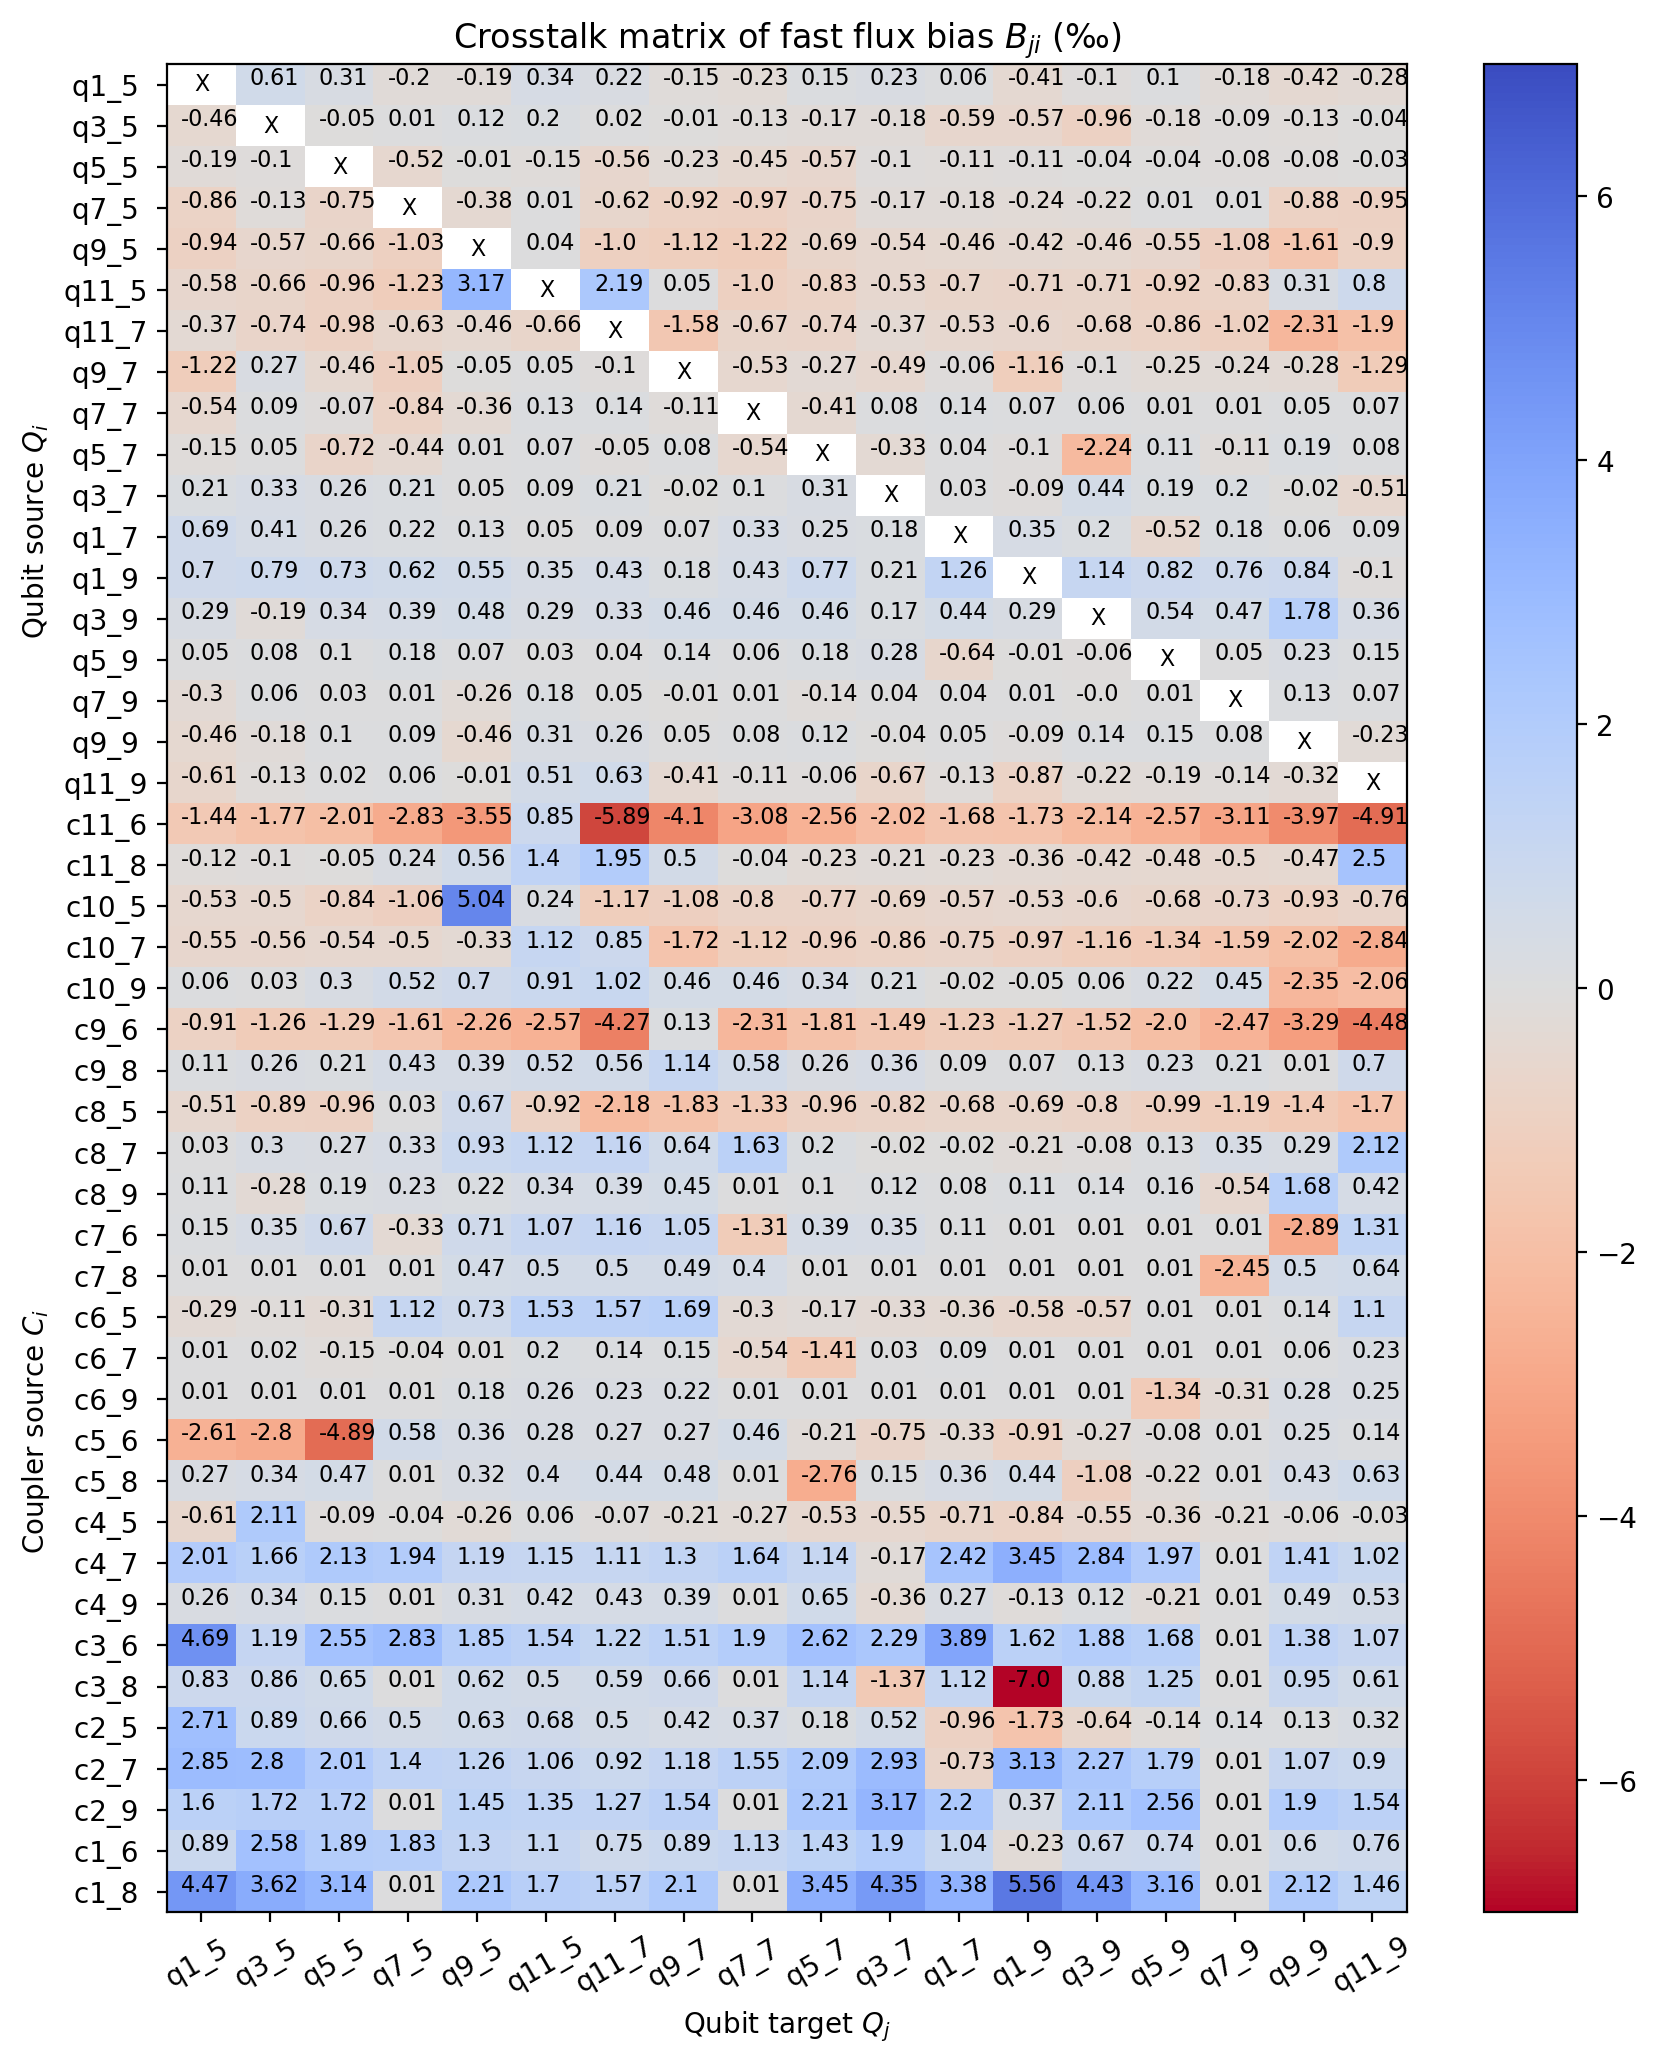

In [2]:
figS10_data = scipy.io.loadmat("figS12.mat", simplify_cells=True)
cmap = colormaps.get_cmap("coolwarm_r")
fig = plt.figure(figsize=(10, 12), dpi=200)
ax = fig.add_subplot(111)
Bji = figS10_data["zxtalk_values"].T
for j, Bj in enumerate(Bji):
    for i, B in enumerate(Bj):
        if B == 1:
            Bji[i, i] = np.nan
            ax.text(i - 0.1, j + 0.15, "X", fontsize=8)
        else:
            ax.text(i - 0.3, j, np.round(B * 1000, 2), fontsize=8)
im = ax.imshow(Bji * 1000, vmin=-7, vmax=7, cmap=cmap, aspect="auto")
ax.set_xticks(np.arange(len(figS10_data["zxtalk_targets"])))
ax.set_xticklabels(figS10_data["zxtalk_targets"], rotation=30)
ax.set_xlabel(r"Qubit target $Q_j$")
ax.set_yticks(np.arange(len(figS10_data["zxtalk_sources"])))
ax.set_yticklabels(figS10_data["zxtalk_sources"])
ax.set_ylabel(r"Coupler source $C_i$" + "\t" * 10 + r"Qubit source $Q_i$")
plt.title(r"Crosstalk matrix of fast flux bias $B_{ji}$ (‰)")
cbar = ax.figure.colorbar(im, ax=ax)